tobac example: Tracking of deep convection based on OLR from convection permitting model simulations
==
This example notebook demonstrates the use of tobac to track deep convection based on the outgoing longwave radiation (OLR) from convection permitting simulations.

The simulation results used in this example were performed as part of the ACPC deep convection intercomparison  case study (http://acpcinitiative.org/Docs/ACPC_DCC_Roadmap_171019.pdf) with WRF using the Morrison microphysics scheme. Simulations were performed with a horizontal grid spacing of 4.5 km.

The data used in this example is downloaded from "zenodo link" automatically as part of the notebooks (This only has to be done once for all the tobac example notebooks).

**Import libraries:**

In [2]:
# Import a range of python libraries used in this notebook:
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import shutil
import datetime
from six.moves import urllib
from pathlib import Path
%matplotlib inline

In [3]:
# Import tobac itself:
import tobac
print('using tobac version', str(tobac.__version__))

using tobac version 1.5.5_exp


In [4]:
# Disable a few warnings:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)

**Download example data:**  
The actual download is only necessary once for all example notebooks.


In [5]:
data_out=Path('../')

In [6]:
# Download the data: This only has to be done once for all tobac examples and can take a while
data_file = list(data_out.rglob('data/Example_input_OLR_model.nc'))
if len(data_file) == 0:
    file_path='https://zenodo.org/records/3195910/files/climate-processes/tobac_example_data-v1.0.1.zip'
    #file_path='http://zenodo..'
    tempfile=Path('temp.zip')
    print('start downloading data')
    request=urllib.request.urlretrieve(file_path, tempfile)
    print('start extracting data')
    shutil.unpack_archive(tempfile, data_out)
    tempfile.unlink()
    print('data extracted')
    data_file = list(data_out.rglob('data/Example_input_OLR_model.nc'))

In [7]:
#Load Data from downloaded file:
OLR=iris.load_cube(str(data_file[0]),'OLR')

In [8]:
#Set up directory to save output and plots:
savedir=Path("Save")
if not savedir.is_dir():
    savedir.mkdir()
plot_dir=Path("Plot")
if not plot_dir.is_dir():
    plot_dir.mkdir()

**Feature detection:**  
Feature detection is performed based on OLR field and a set of thresholds.

In [9]:
# Determine temporal and spatial sampling:
dxy,dt=tobac.get_spacings(OLR)

In [10]:
# Dictionary containing keyword arguments for feature detection step (Keywords could also be given directly in the function call).
parameters_features={}
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']=0.5
parameters_features['n_min_threshold']=4
parameters_features['target']='minimum'
parameters_features['threshold']=[250,225,200,175,150]

In [11]:
# Perform feature detection:
print('starting feature detection')
Features=tobac.feature_detection_multithreshold(OLR,dxy, **parameters_features)
Features.to_hdf(savedir / 'Features.h5', 'table')
print('feature detection performed and saved')

starting feature detection
feature detection performed and saved


## Debug

In [12]:
import xarray as xr
v3d = xr.DataArray.from_iris( OLR )

a = v3d.isel(time = 0).load().data

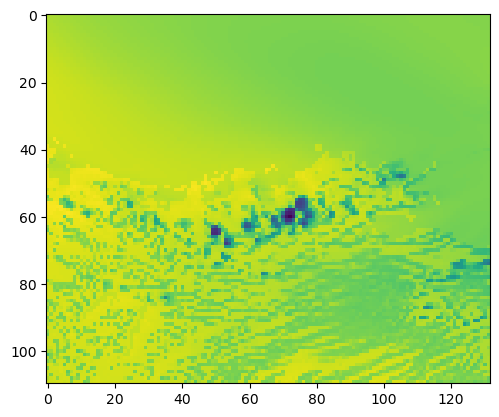

In [13]:
plt.imshow(a)

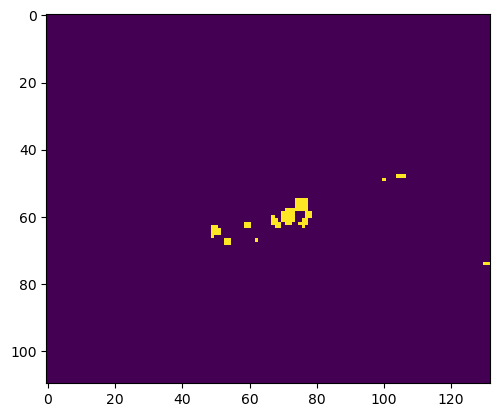

In [14]:
plt.imshow(a<230)

In [15]:
feat, reg = tobac.feature_detection.feature_detection_threshold(
    a,
    0,
    230,
    target="minimum",
    n_min_threshold=0,
    sigma_threshold=0.5,
    position_threshold="weighted_diff",
)

In [16]:
reg

{1: array([6440, 6441, 6442]),
 2: array([6568]),
 3: array([7334, 7335, 7336, 7337, 7466, 7467, 7468, 7469, 7598, 7599, 7600,
        7601, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7858, 7859, 7860,
        7861, 7865, 7866, 7987, 7990, 7991, 7992, 7993, 7997, 7998, 8119,
        8120, 8122, 8123, 8124, 8125, 8128, 8129, 8251, 8252, 8253, 8255,
        8256, 8259, 8260, 8261, 8384, 8385, 8392]),
 4: array([8243, 8244, 8375, 8376]),
 5: array([8365, 8366, 8497, 8498, 8499, 8629, 8630, 8631, 8761]),
 6: array([8897, 8898, 9029, 9030]),
 7: array([8906]),
 8: array([9898, 9899])}

In [17]:
s = a.shape

l = np.zeros_like( a.ravel() )

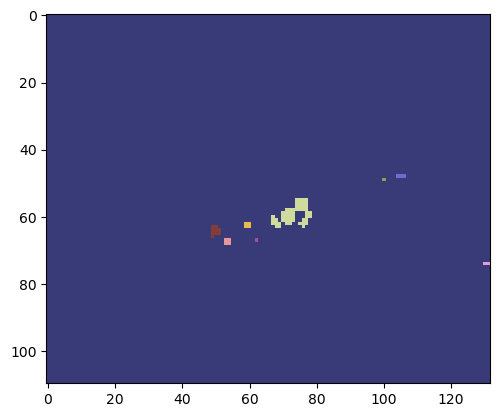

In [18]:
for k in reg.keys():
    l[reg[k]] = k

l = l.reshape( s )
plt.imshow(l, cmap = plt.cm.tab20b) 

In [19]:
for i_time, data_i in enumerate(OLR.slices_over("time")):
    continue

In [20]:
data_i

Olr (W m-2),south_north,west_east
Shape,110,132
Dimension coordinates,,
south_north,x,-
west_east,-,x
Auxiliary coordinates,,
projection_y_coordinate,x,-
y,x,-
latitude,x,x
longitude,x,x
projection_x_coordinate,-,x


In [21]:
feat, reg = tobac.feature_detection.feature_detection_multithreshold_timestep(
    data_i,
    0,
    threshold=[230,250],
    target="minimum",
    return_regions = True,
)

for ilab in reg:
    print(ilab, reg[ilab])

1 [6858 6989 6990 6991]
6 [9781]
7 [9869]
8 [10449]
9 [10659 10660 10791 10792 10793 10794 10795]
11 [12777]
13 [ 7099  7228  7229  7230  7231  7232  7246  7247  7248  7249  7259  7360
  7361  7362  7363  7364  7372  7373  7374  7375  7376  7377  7378  7379
  7380  7381  7382  7390  7391  7492  7493  7494  7495  7496  7504  7505
  7506  7507  7508  7509  7510  7511  7512  7513  7514  7515  7522  7523
  7627  7628  7629  7633  7634  7635  7636  7637  7638  7639  7640  7641
  7642  7643  7644  7645  7646  7647  7648  7649  7654  7655  7762  7763
  7764  7765  7766  7767  7768  7769  7770  7771  7772  7773  7776  7777
  7778  7779  7780  7781  7782  7786  7787  7895  7896  7897  7898  7899
  7901  7902  7903  7904  7905  7907  7908  7909  7910  7911  7912  7913
  7914  7915  7916  7917  7918  7919  8027  8028  8029  8030  8031  8032
  8033  8034  8035  8036  8037  8038  8039  8040  8041  8042  8043  8044
  8045  8046  8047  8048  8049  8050  8051  8159  8160  8161  8162  8163
  8164  8165

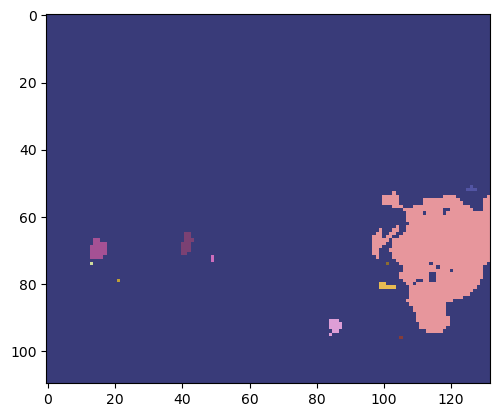

In [22]:
s = a.shape

l = np.zeros_like( a.ravel() )

for k in reg.keys():
    l[reg[k]] = k

l = l.reshape( s )
plt.imshow(l, cmap = plt.cm.tab20b) 

In [23]:
Features, Regions=tobac.feature_detection_multithreshold(OLR,dxy, return_regions = True, **parameters_features)

In [24]:
Regions

[{5: array([8243, 8244, 8245, 8374, 8375, 8376, 8377, 8507, 8508]),
  8: array([8897, 8898, 9029, 9030, 9161, 9162]),
  11: array([9766, 9767, 9897, 9898, 9899]),
  12: array([ 9889,  9890,  9891, 10021, 10022, 10023]),
  np.int64(17): array([8365, 8366, 8497, 8498, 8499, 8629, 8630, 8631]),
  np.int64(20): array([7728, 7729, 7859, 7860, 7861, 7991, 7992, 7993, 8123, 8124])},
 {9: array([8765, 8766, 8897, 8898, 8899, 9029, 9030, 9031, 9161, 9162, 9163]),
  11: array([ 9760,  9890,  9891,  9892, 10023]),
  12: array([ 9767,  9897,  9898,  9899, 10029]),
  np.int64(16): array([8243, 8244, 8245, 8375, 8376]),
  np.int64(17): array([8366, 8367, 8497, 8498, 8499, 8629, 8630, 8631]),
  np.int64(22): array([7860, 7861, 7991, 7992, 7993, 8124])},
 {2: array([6568, 6569, 6570, 6700, 6701]),
  10: array([ 9767,  9897,  9898,  9899, 10029, 10030]),
  np.int64(14): array([8112, 8113, 8244, 8245, 8376]),
  np.int64(20): array([8366, 8367, 8498, 8499, 8500, 8630, 8631]),
  np.int64(21): array([8897,

In [25]:
xOLR = xr.DataArray.from_iris( OLR )

In [26]:
l = xr.zeros_like( xOLR ).load()

In [32]:
lstack = l.stack( hdim = ["south_north", "west_east"] )

In [33]:
for itime, reg in enumerate( Regions ):
    for ilab in reg:
        lstack[itime, reg[ilab]] = ilab

In [34]:
l = lstack.unstack( "hdim" )

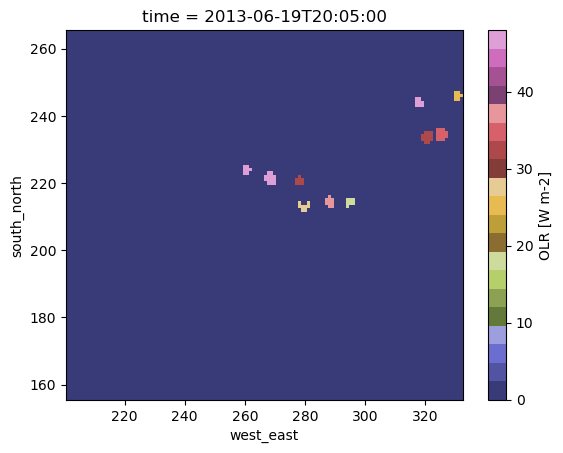

In [36]:
l.isel( time = 12 ).plot( cmap = plt.cm.tab20b )

**Segmentation:**  
Segmentation is performed with watershedding based on the detected features and a single threshold value.

In [ ]:
# Dictionary containing keyword options for the segmentation step:
parameters_segmentation={}
parameters_segmentation['target']='minimum'
parameters_segmentation['method']='watershed'
parameters_segmentation['threshold']=250

In [ ]:
# Perform segmentation and save results:
print('Starting segmentation based on OLR.')
Mask_OLR,Features_OLR=tobac.segmentation_2D(Features,OLR,dxy,**parameters_segmentation)
print('segmentation OLR performed, start saving results to files')
iris.save([Mask_OLR], savedir / 'Mask_Segmentation_OLR.nc', zlib=True, complevel=4)                
Features_OLR.to_hdf(savedir / 'Features_OLR.h5', 'table')
print('segmentation OLR performed and saved')

Starting segmentation based on OLR.
segmentation OLR performed, start saving results to files
segmentation OLR performed and saved


**Trajectory linking:**  
Features are linked into cloud trajectories using the trackpy library (http://soft-matter.github.io/trackpy). This takes the feature positions determined in the feature detection step into account but does not include information on the shape of the identified objects.**

In [ ]:
# Arguments for trajectory linking:
parameters_linking={}
parameters_linking['v_max']=20
parameters_linking['stubs']=2
parameters_linking['order']=1
parameters_linking['extrapolate']=0
parameters_linking['memory']=0
parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['subnetwork_size']=100
parameters_linking['method_linking']= 'predict'

In [ ]:
# Perform linking and save results to file:
Track=tobac.linking_trackpy(Features, OLR, dt=dt, dxy=dxy, **parameters_linking)
Track.to_hdf(savedir / 'Track.h5', 'table')

Frame 95: 12 trajectories present.


**Visualisation:**

In [ ]:
# Set extent of maps created in the following cells:
axis_extent = [-95, -89, 28, 32]        

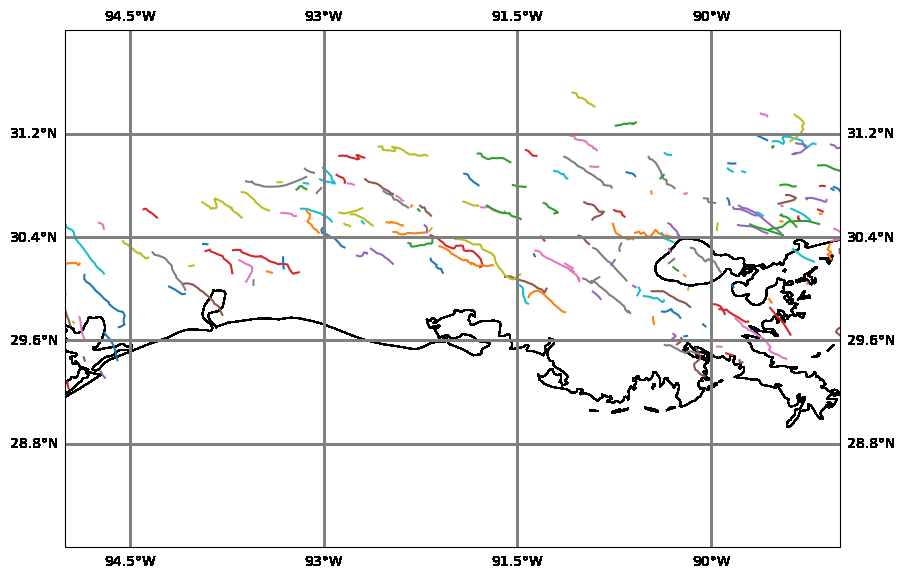

In [ ]:
# Plot map with all individual tracks:
import cartopy.crs as ccrs
fig_map, ax_map = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
ax_map = tobac.map_tracks(Track, axis_extent=axis_extent,  axes=ax_map)

In [ ]:
# Create animation of tracked clouds and outlines with OLR as a background field
animation_test_tobac=tobac.animation_mask_field(Track,Features,OLR,Mask_OLR,
                                          axis_extent=axis_extent,#figsize=figsize,orientation_colorbar='horizontal',pad_colorbar=0.2,
                                          vmin=80,vmax=330,
                                          plot_outline=True,plot_marker=True,marker_track='x',plot_number=True,plot_features=True)

In [ ]:
# Display animation:
from IPython.display import HTML, Image, display
HTML(animation_test_tobac.to_html5_video())

<Figure size 640x480 with 0 Axes>

In [ ]:
# # Save animation to file:
# savefile_animation = plot_dir /'Animation.mp4'
# animation_test_tobac.save(savefile_animation,dpi=200)
# print(f'animation saved to {savefile_animation}')

Text(0, 0.5, 'counts')

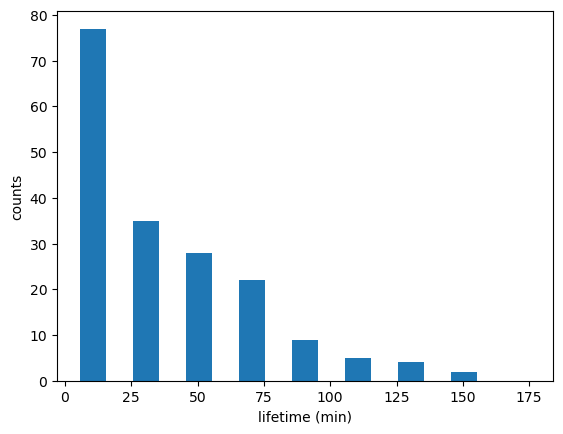

In [ ]:
# Lifetimes of tracked clouds:
fig_lifetime,ax_lifetime=plt.subplots()
tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(0,200,20),density=False,width_bar=10)
ax_lifetime.set_xlabel('lifetime (min)')
ax_lifetime.set_ylabel('counts')
         